In [28]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix,precision_score,recall_score,roc_auc_score,roc_curve,f1_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB

In [29]:
spam_mail_data=pd.read_csv(r"C:\Users\Mahima\OneDrive\Desktop\Cyberwaltcompany\spam mail data set.csv", na_values=['',' '])

In [30]:
spam_mail_data.head()

,Message ID,Subject,Message,Spam/Ham,Date
0,0,christmas tree farm pictures,NaN,ham,1999-12-10
1,1,"vastar resources , inc .","gary , production from the high island larger ...",ham,1999-12-13
2,2,calpine daily gas nomination,- calpine daily gas nomination 1 . doc,ham,1999-12-14
3,3,re : issue,fyi - see note below - already done .\nstella\...,ham,1999-12-14
4,4,meter 7268 nov allocation,fyi .\n- - - - - - - - - - - - - - - - - - - -...,ham,1999-12-14


In [31]:
print(spam_mail_data['Spam/Ham'].unique())

['ham' 'spam']


In [32]:
spam_mail_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33716 entries, 0 to 33715
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Message ID  33716 non-null  int64 
 1   Subject     33427 non-null  object
 2   Message     33345 non-null  object
 3   Spam/Ham    33716 non-null  object
 4   Date        33716 non-null  object
dtypes: int64(1), object(4)
memory usage: 1.3+ MB


In [33]:
spam_mail_data.describe()

,Message ID
count,33716.000000
mean,16857.500000
std,9733.115174
min,0.000000
25%,8428.750000
50%,16857.500000
75%,25286.250000
max,33715.000000


In [34]:
spam_mail_data.isnull().sum()

Message ID      0
Subject       289
Message       371
Spam/Ham        0
Date            0
dtype: int64

In [35]:
df=spam_mail_data['Subject'].fillna(" ", inplace=True)

C:\Users\Mahima\AppData\Local\Temp\ipykernel_25040\836593711.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df=spam_mail_data['Subject'].fillna(" ", inplace=True)


In [36]:
spam_mail_data.isnull().sum()

Message ID      0
Subject         0
Message       371
Spam/Ham        0
Date            0
dtype: int64

In [37]:
df2=spam_mail_data['Message'].fillna(" ",inplace=True)

C:\Users\Mahima\AppData\Local\Temp\ipykernel_25040\1328911073.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df2=spam_mail_data['Message'].fillna(" ",inplace=True)


In [38]:
spam_mail_data.isnull().sum()

Message ID    0
Subject       0
Message       0
Spam/Ham      0
Date          0
dtype: int64

In [39]:
spam_mail_data = spam_mail_data.drop(columns=['Message ID','Date'])

# Correct text combine
spam_mail_data["text"] = (
    spam_mail_data["Subject"].fillna("") + " " + spam_mail_data["Message"].fillna("")
)

# Correct Label Encode
spam_mail_data["label"] = spam_mail_data["Spam/Ham"].map({"ham": 0, "spam": 1})

# Exploratory Analysis

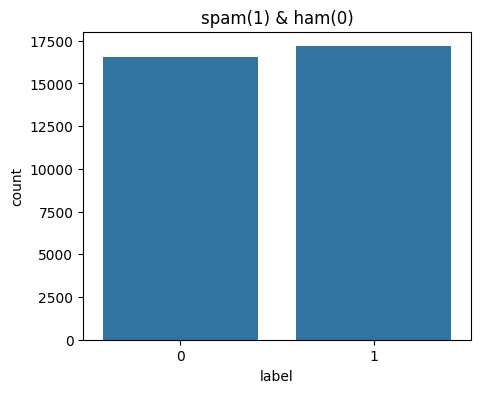

In [40]:
plt.figure(figsize=(5,4))
sns.countplot(x='label', data=spam_mail_data)
plt.title("spam(1) & ham(0)")
plt.show()

### Interpretation
### The bar chart represents the distribution of spam (1) and ham (0) messages in the dataset.
### From the graph, it is clear that the number of spam (1) messages is much higher than the number of ham (0) messages.

## Model Spliting 

In [41]:
spam_mail_data.head()

,Subject,Message,Spam/Ham,text,label
0,christmas tree farm pictures,,ham,christmas tree farm pictures,0
1,"vastar resources , inc .","gary , production from the high island larger ...",ham,"vastar resources , inc . gary , production fro...",0
2,calpine daily gas nomination,- calpine daily gas nomination 1 . doc,ham,calpine daily gas nomination - calpine daily g...,0
3,re : issue,fyi - see note below - already done .\nstella\...,ham,re : issue fyi - see note below - already done...,0
4,meter 7268 nov allocation,fyi .\n- - - - - - - - - - - - - - - - - - - -...,ham,meter 7268 nov allocation fyi .\n- - - - - - -...,0


In [42]:
x=spam_mail_data['text']
y=spam_mail_data['label']

In [43]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [44]:
tfidf=TfidfVectorizer(stop_words='english')
x_train_tfidf=tfidf.fit_transform(x_train)
x_test_tfidf=tfidf.transform(x_test)

In [45]:
model=MultinomialNB()
model.fit(x_train_tfidf,y_train)

,alpha,1.0
,force_alpha,True
,fit_prior,True
,class_prior,None


In [46]:
y_pred = model.predict(x_test_tfidf)

In [47]:
print("✔ Accuracy:", accuracy_score(y_test, y_pred))
print("\n✔ Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\n✔ Classification Report:\n", classification_report(y_test, y_pred))

✔ Accuracy: 0.9887307236061684

✔ Confusion Matrix:
 [[3237   39]
 [  37 3431]]

✔ Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      3276
           1       0.99      0.99      0.99      3468

    accuracy                           0.99      6744
   macro avg       0.99      0.99      0.99      6744
weighted avg       0.99      0.99      0.99      6744



In [48]:
def predict_mail(text):
    vector = tfidf.transform([text])
    output = model.predict(vector)[0]
    return "SPAM" if output == 1 else "HAM"

In [51]:
print("\nTest Message Prediction:")
print(predict_mail("Meeting tommorow!!!"))


Test Message Prediction:
HAM


In [50]:
test_message = "Congratulations! You have won $1000. Click the link to claim your prize now!"
print("Input Message:", test_message)
print("Prediction:", predict_mail(test_message))

Input Message: Congratulations! You have won $1000. Click the link to claim your prize now!
Prediction: SPAM
